In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data Pre-Processing

In [21]:
Data = pd.read_csv("D:\#1 DataScience\DataSet\placement.csv")
Data.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [22]:
Data.describe()

,Unnamed: 0,cgpa,iq,placement
count,100.000000,100.000000,100.000000,100.000000
mean,49.500000,5.991000,123.580000,0.500000
std,29.011492,1.143634,39.944198,0.502519
min,0.000000,3.300000,37.000000,0.000000
25%,24.750000,5.075000,101.500000,0.000000
50%,49.500000,6.000000,127.500000,0.500000
75%,74.250000,6.900000,149.000000,1.000000
max,99.000000,8.500000,233.000000,1.000000


In [23]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [24]:
Data.columns

Index(['Unnamed: 0', 'cgpa', 'iq', 'placement'], dtype='object')

In [25]:
Data.drop(columns='Unnamed: 0', inplace=True)
Data.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [26]:
Data.corr()

,cgpa,iq,placement
cgpa,1.000000,-0.098791,0.821688
iq,-0.098791,1.000000,-0.083031
placement,0.821688,-0.083031,1.000000


### Performing EDA

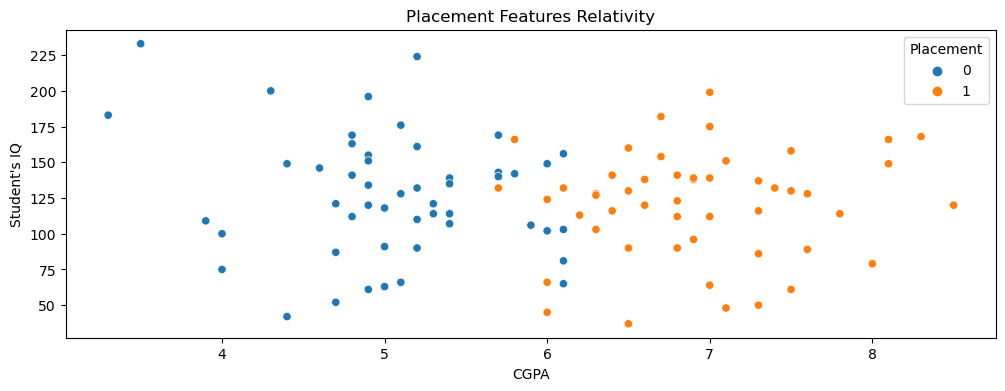

In [36]:
plt.figure(figsize = (12, 4))

sns.scatterplot(Data, x = Data['cgpa'], y = Data['iq'], hue = 'placement')

plt.title("Placement Features Relativity")
plt.xlabel("CGPA")
plt.ylabel("Student's IQ")

plt.legend(title = "Placement")

plt.show()

### Model Building

In [38]:
# Importing TTS model

from sklearn.model_selection import train_test_split

In [39]:
Data.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [40]:
X = Data[['cgpa', 'iq']]
Y = Data['placement']

In [69]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.1, random_state = 10)

In [70]:
# Performing Scaling on the data

from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()

In [71]:
X_Train = Scaler.fit_transform(X_Train)
X_Test = Scaler.fit_transform(X_Test)

### Model Training

In [72]:
# Performing Logistic Regression over the data to train the Model

from sklearn.linear_model import LogisticRegression
LoR = LogisticRegression()

In [73]:
LoR.fit(X_Train, Y_Train)

LogisticRegression()

In [74]:
LoR.score(X_Test, Y_Test)

1.0

In [77]:
# Calculating the accuracy score with the accuracy library

from sklearn.metrics import accuracy_score

In [81]:
Y_Predict = LoR.predict(X_Test)

In [83]:
Y_Predict

array([0, 0, 1, 1, 1, 1, 1, 0, 1, 0], dtype=int64)

In [84]:
accuracy_score(Y_Test, Y_Predict)

1.0

### Visualizing the Model Plot

In [91]:
from mlxtend.plotting import plot_decision_regions

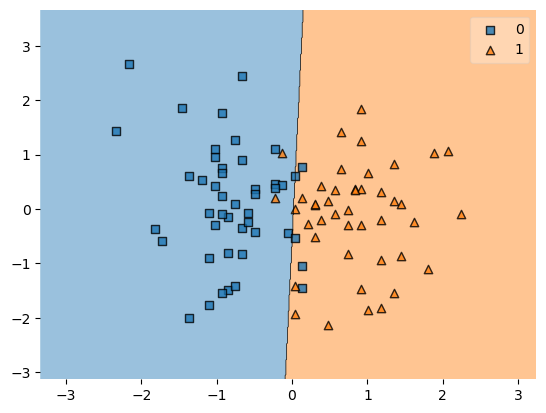

In [92]:
plot_decision_regions(X_Train, Y_Train.values, clf = LoR)

plt.show()

### Exporting the Model

In [93]:
import pickle

pickle.dump(LoR, open('Placement_Model.pkl', 'wb'))